In [1]:
!which python

/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/bin/python


# Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_colwidth',1000)
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from joblib import dump
%matplotlib inline

In [1]:
PROCESSED_DATA = False
SELECTED_DATA = False
SAVE_MODEL = False


## Load data

In [4]:
all_data = pd.read_json("all_video_details.json")
display(all_data.head())

,kind,etag,id,snippet,contentDetails,status,statistics
0,youtube#video,nOcIl8egghJMteumC8c7vnvuJxc,5JUuZWVBOuk,"{'publishedAt': '2023-08-04T08:24:59Z', 'channelId': 'UCNUFterLJ9vpFZZ0try7sLA', 'title': 'শীর্ষ সংবাদ | দুপুর ২টা | ০৪ আগস্ট ২০২৩ | Somoy TV Headline 2pm | Latest Bangladeshi News', 'description': 'শীর্ষ সংবাদ | দুপুর ২টা | ০৪ আগস্ট ২০২৩ | Somoy TV Headline 2pm | Latest Bangladeshi News #chattogram_waterlog #garments_industry #bazar_update #bnpsomabesh #somoytvbulletin শীর্ষ সংবাদ: ========= মাত্র ৩৩ মিলিমিটার বৃষ্টিতেই কোমর সমান পানিতে বন্দর নগরী চট্টগ্রাম। ডুবেছে রাস্তাঘাট, ব্যবসায় প্রতিষ্ঠান, বাসাবাড়ি। জনদুর্ভোগ চরমে। কোটি কোটি টাকার ক্ষতি ব্যবসায়ীদের. বিভিন্ন স্থানে পাহাড় ধস। আতঙ্কে বসবাসকারীরা. জলাবদ্ধতা নিরসনে আট বছরেও বাস্তবায়ন হয়নি ৪ প্রকল্প। সমন্বয়হীনতা ও সম্ভাব্যতা যাচাইয়ে ত্রুটিই কারণ. তারেক-জুবাইদার কারাদণ্ডের প্রতিবাদে বিএনপির সমাবেশ। নয়াপল্টনে ভিড়। ব্যক্তিস্বার্থে দলটিকে ব্যবহার করছে জিয়া পরিবার। মন্তব্য আওয়ামী লীগ নেতার। ডেঙ্গু আক্রান্তের হারে ঢাকাকে ছাড়িয়ে যাচ্ছে গ্রামাঞ্চল। বাড়াচ্ছে উদ্বেগ। রাজধানীর বাইরেও চিকিৎসা সুবিধা বাড়ানোর আহ্বান। জোর দিতে হবে মশা ...","{'duration': 'PT2M12S', 'dimension': '2d', 'definition': 'hd', 'caption': 'false', 'licensedContent': True, 'contentRating': {}, 'projection': 'rectangular'}","{'uploadStatus': 'processed', 'privacyStatus': 'public', 'license': 'youtube', 'embeddable': True, 'publicStatsViewable': True, 'madeForKids': False}","{'viewCount': '5392', 'likeCount': '166', 'favoriteCount': '0', 'commentCount': '1'}"
1,youtube#video,w-1GqZKOdVCVc8Tt8HWMA19OLtU,4xcrNk9TaJE,"{'publishedAt': '2023-08-04T08:15:00Z', 'channelId': 'UCpHTAE2EOwWkWGnW2HY8gRw', 'title': ''บก.ลายจุด' ให้คติ #เพื่อไทย ถ้าไปอยู่กับศัตรู อย่าถูกหลอกใช้-หันมาทำลายเพื่อน #wakeupthailand', 'description': 'สมัครสมาชิกเพื่อรับสิทธิพิเศษ (Membership) https://www.youtube.com/channel/UCpHTAE2EOwWkWGnW2HY8gRw/join ติดตาม VoiceTV YouTube : https://www.youtube.com/channel/UCpHTAE2EOwWkWGnW2HY8gRw Facebook : https://www.facebook.com/wakeupthailand Instagram : https://www.instagram.com/voicetv/ Twitter : https://twitter.com/VoiceTVOfficial Website : https://www.voicetv.co.th/ LINE : https://liff.line.me/1645278921-kWRPP32q/?accountId=voicetv #VoiceTV #thedailydose', 'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/4xcrNk9TaJE/default.jpg', 'width': 120, 'height': 90}, 'medium': {'url': 'https://i.ytimg.com/vi/4xcrNk9TaJE/mqdefault.jpg', 'width': 320, 'height': 180}, 'high': {'url': 'https://i.ytimg.com/vi/4xcrNk9TaJE/hqdefault.jpg', 'width': 480, 'height': 360}, 'standard': {'url'...","{'duration': 'PT25M6S', 'dimension': '2d', 'definition': 'hd', 'caption': 'false', 'licensedContent': True, 'contentRating': {}, 'projection': 'rectangular'}","{'uploadStatus': 'processed', 'privacyStatus': 'public', 'license': 'youtube', 'embeddable': True, 'publicStatsViewable': True, 'madeForKids': False}","{'viewCount': '3805', 'likeCount': '102', 'favoriteCount': '0', 'commentCount': '32'}"
2,youtube#video,7gCG64i-stV0r-iYZnkafxGyFlg,q32mn4ls6Co,"{'publishedAt': '2023-08-04T08:09:32Z', 'channelId': 'UC1dI4tO13ApuSX0QeX8pHng', 'title': 'Puncak kecanggihan tablet Rp22.000.000!!! 🤯', 'description': 'Berlebihan... Link pembelian: https://tokopedia.link/YkeznwO2YBb Barang bekas review biasanya saya jual disini: https://invol.co/cl75vrb Beberapa toko HP yang oke (kejual puluhan ribu unit + rating tinggi): https://tokopedia.link/AKIOook8Qvb https://tokopedia.link/anYzx6q8Qvb https://tokopedia.link/iD40kiC8Qvb https://tokopedia.link/DP7QokS8Qvb https://tokopedia.link/pMWv2tU8Qvb Instagram GadgetIn: https://www.instagram.com/gadgetins/ Twitter GadgetIn: https://twitter.com/DGadgetIn Facebook GadgetIn: https://www.facebook.com/DgadgetIn Email untuk kerjasama: davidbrendi88@gmail.com :00 Wah… Wogh! Wow!!! 0:15 Budayakan flexing 0:33 🥶🥶🥶 0:51 Samsung nggak bodo 1:03 Mari berkhayal bentar 1:19 Ga ada istilah geser ke kiri 1:44 Nggak bener bener 1000GB sih… Tapi kan… 2:07 KAMU MASIH NANYAAA? 🤨 2:28 Ga bahaya ta! 3:07 …ini ide E

In [5]:
print(f"shape of json: {all_data.shape}")
print(f"{all_data.isnull().mean()}")

shape of json: (4538, 7)
kind              0.0
etag              0.0
id                0.0
snippet           0.0
contentDetails    0.0
status            0.0
statistics        0.0
dtype: float64


## Statistics data

In [6]:
stats = all_data.statistics
# stats.apply(lambda x: x.split(":"))
stats_df = []
for i in stats:
    records = pd.DataFrame([i]).reset_index(drop=True)
    # print(records)
    stats_df.append(records)
stats_df = pd.concat(stats_df,ignore_index=True)


In [7]:
stats_df.head()

,viewCount,likeCount,favoriteCount,commentCount
0,5392,166,0,1
1,3805,102,0,32
2,29986,2171,0,385
3,2084,40,0,NaN
4,120380,874,0,3


In [8]:
stats_df.tail()

,viewCount,likeCount,favoriteCount,commentCount
4533,3838678,73605,0,5021
4534,3807856,113732,0,2315
4535,1482434,17484,0,938
4536,558352,3410,0,203
4537,3626419,18355,0,816


## Content details data

In [9]:
cont_details = all_data.contentDetails
cont_details_df = []
for i in cont_details:
    # print(i)
    records = pd.DataFrame([i]).reset_index(drop=True)
    # print(records)
    cont_details_df.append(records)
cont_details_df = pd.concat(cont_details_df,ignore_index=True)


In [10]:
cont_details_df.head()

,duration,dimension,definition,caption,licensedContent,contentRating,projection,regionRestriction
0,PT2M12S,2d,hd,false,True,{},rectangular,NaN
1,PT25M6S,2d,hd,false,True,{},rectangular,NaN
2,PT10M36S,2d,hd,false,True,{},rectangular,NaN
3,PT3M2S,2d,hd,false,True,{},rectangular,NaN
4,PT6H6M14S,2d,hd,false,True,{},rectangular,NaN


In [11]:
cont_details_df.tail()

,duration,dimension,definition,caption,licensedContent,contentRating,projection,regionRestriction
4533,PT34M42S,2d,hd,false,True,{},rectangular,NaN
4534,PT12M,2d,hd,false,True,{},rectangular,NaN
4535,PT13M42S,2d,hd,false,True,{},rectangular,NaN
4536,PT2M59S,2d,hd,true,True,{},rectangular,NaN
4537,PT3H40M1S,2d,hd,false,True,{},rectangular,NaN


## Status data

In [12]:
status = all_data.status
status_df = []
for i in status:
    records = pd.DataFrame([i]).reset_index(drop=True)
    # print(records)
    status_df.append(records)
status_df = pd.concat(status_df,ignore_index=True)
    

In [13]:
status_df.head()

,uploadStatus,privacyStatus,license,embeddable,publicStatsViewable,madeForKids
0,processed,public,youtube,True,True,False
1,processed,public,youtube,True,True,False
2,processed,public,youtube,True,True,False
3,processed,public,youtube,True,True,False
4,processed,public,youtube,True,True,False


In [14]:
stats_df.tail()

,viewCount,likeCount,favoriteCount,commentCount
4533,3838678,73605,0,5021
4534,3807856,113732,0,2315
4535,1482434,17484,0,938
4536,558352,3410,0,203
4537,3626419,18355,0,816


## Data Extraction

In [15]:
df = pd.concat([status_df,stats_df,cont_details_df],axis=1)


## dumb the processed data for further analysis.

if PROCESSED_DATA:
    df.to_csv('processed_data',index=False)

## Load processed data

In [16]:
df = pd.read_csv('processed_data')

In [17]:
df.head()

,uploadstatus,privacystatus,license,embeddable,publicstatsviewable,madeforkids,viewcount,likecount,favoritecount,commentcount,duration,dimension,definition,caption,licensedcontent,contentrating,projection,regionrestriction
0,processed,public,youtube,True,True,False,5392,166,0,1,132,2d,hd,False,True,{},rectangular,NaN
1,processed,public,youtube,True,True,False,3805,102,0,32,1506,2d,hd,False,True,{},rectangular,NaN
2,processed,public,youtube,True,True,False,29986,2171,0,385,636,2d,hd,False,True,{},rectangular,NaN
3,processed,public,youtube,True,True,False,2084,40,0,0,182,2d,hd,False,True,{},rectangular,NaN
4,processed,public,youtube,True,True,False,120380,874,0,3,734,2d,hd,False,True,{},rectangular,NaN


In [18]:
df.tail()

,uploadstatus,privacystatus,license,embeddable,publicstatsviewable,madeforkids,viewcount,likecount,favoritecount,commentcount,duration,dimension,definition,caption,licensedcontent,contentrating,projection,regionrestriction
4533,processed,public,youtube,True,False,False,3838678,73605,0,5021,2082,2d,hd,False,True,{},rectangular,NaN
4534,processed,public,youtube,True,True,False,3807856,113732,0,2315,720,2d,hd,False,True,{},rectangular,NaN
4535,processed,public,youtube,False,True,False,1482434,17484,0,938,822,2d,hd,False,True,{},rectangular,NaN
4536,processed,public,youtube,True,False,False,558352,3410,0,203,179,2d,hd,True,True,{},rectangular,NaN
4537,processed,public,youtube,False,True,False,3626419,18355,0,816,2581,2d,hd,False,True,{},rectangular,NaN


In [19]:
df.shape

(4538, 18)

In [20]:
## lowering  all column names for uniformity
df.columns = df.columns.str.lower()

## Data types

In [21]:
df.dtypes

uploadstatus           object
privacystatus          object
license                object
embeddable               bool
publicstatsviewable      bool
madeforkids              bool
viewcount               int64
likecount               int64
favoritecount           int64
commentcount            int64
duration                int64
dimension              object
definition             object
caption                  bool
licensedcontent          bool
contentrating          object
projection             object
regionrestriction      object
dtype: object

## Observation
- let us convert feature with ***bool*** dtype to object.

In [22]:
for col in ['caption','licensedcontent','madeforkids','publicstatsviewable','embeddable']:

    df[col] = df[col].map({True:'True',False:'False'}).astype('O')
    print(f"{col}:{df[col].dtype}")

caption:object
licensedcontent:object
madeforkids:object
publicstatsviewable:object
embeddable:object


## Drop duplicates

In [23]:
print(f"no of duplicates records: {df[df.duplicated()].shape}\n")

# df = df.drop_duplicates()

print(f"shape after droping duplicates: {df.shape}")


no of duplicates records: (102, 18)

shape after droping duplicates: (4538, 18)


In [24]:
## variance
for col in df.columns:
    print(f"{col}:{df[col].nunique()}")

uploadstatus:2
privacystatus:1
license:2
embeddable:2
publicstatsviewable:2
madeforkids:2
viewcount:4152
likecount:3434
favoritecount:1
commentcount:1579
duration:1618
dimension:1
definition:2
caption:2
licensedcontent:2
contentrating:2
projection:1
regionrestriction:64


## Observation
- Columns `privacystatus`,`favoritecount`,`dimension`,`projection` has 1 unique values which means zero variance and will not contribute to our analysis, hence droping this columns.

In [25]:
## droping columns with zero variance

df.drop(['privacystatus','favoritecount','dimension','projection'],axis=1,inplace=True)

print(f"shape after drop: {df.shape}")

shape after drop: (4538, 14)


In [26]:
def set_labels(title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=(7,5))
    plt.title(title,fontdict={'fontsize':15,'fontweight':'bold'})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    

Missing Values: 
uploadstatus           0.00000
license                0.00000
embeddable             0.00000
publicstatsviewable    0.00000
madeforkids            0.00000
viewcount              0.00000
likecount              0.00000
commentcount           0.00000
duration               0.00000
definition             0.00000
caption                0.00000
licensedcontent        0.00000
contentrating          0.00000
regionrestriction      0.80498
dtype: float64


<Axes: title={'center': 'Missing Values'}>

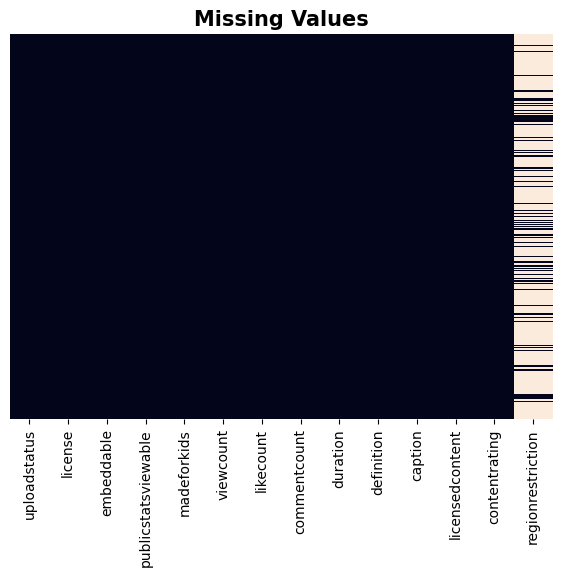

In [27]:
print(f"Missing Values: \n{df.isnull().mean()}")
set_labels("Missing Values")
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)


## Observation 
- column `regionrestriction` has more than 80% missing values, we go ahead and drop this column.

In [28]:
df.drop('regionrestriction',axis=1,inplace=True)

print(f"shape after drop: {df.shape}")

shape after drop: (4538, 13)


## Statistical Analysis

In [29]:
df.describe(percentiles=[.05,.15,.25,.35,.50,.65,.75,.85])

,viewcount,likecount,commentcount,duration
count,4.538000e+03,4.538000e+03,4538.000000,4538.000000
mean,1.044297e+07,1.029009e+05,1586.770163,749.934993
std,7.354295e+07,6.410487e+05,11364.696215,808.363928
min,0.000000e+00,0.000000e+00,0.000000,0.000000
5%,0.000000e+00,1.000000e+00,0.000000,41.000000
15%,1.672330e+04,7.100000e+01,0.000000,123.000000
25%,1.477722e+05,6.092500e+02,0.000000,196.000000
35%,2.332970e+05,1.514900e+03,2.000000,269.000000
50%,5.201740e+05,3.866500e+03,108.500000,447.500000
65%,1.300663e+06,1.059400e+04,368.050000,672.050000


## Observation
- for column `duration` we have some records with value as zero, which does not make sense, hence removing records with value as zero in the `duration` column

In [30]:
print(f'no of record with zero duration time: {df.query(f"duration==0").shape[0]}')

df = df.query(f"duration!=0")

print(f"shape after removal of records: {df.shape}")

no of record with zero duration time: 16
shape after removal of records: (4522, 13)


In [31]:
## categorizing columns as numerical and categorical for further analysis

numerical_columns = [col for col in df.columns if df[col].dtype == 'int64']
categorical_columns = [col for col in df.columns if col not in numerical_columns]

print(f"Numerical columns: \n{numerical_columns}")
print(f"no of numerical columns: {len(numerical_columns)}\n")

print(f"Categorical columns: \n{categorical_columns}")
print(f"no of categorical_columns: {len(categorical_columns)}")


    

Numerical columns: 
['viewcount', 'likecount', 'commentcount', 'duration']
no of numerical columns: 4

Categorical columns: 
['uploadstatus', 'license', 'embeddable', 'publicstatsviewable', 'madeforkids', 'definition', 'caption', 'licensedcontent', 'contentrating']
no of categorical_columns: 9


## EDA
### Categorical Columns

Values count for uploadstatus
processed    1.0
Name: count, dtype: float64


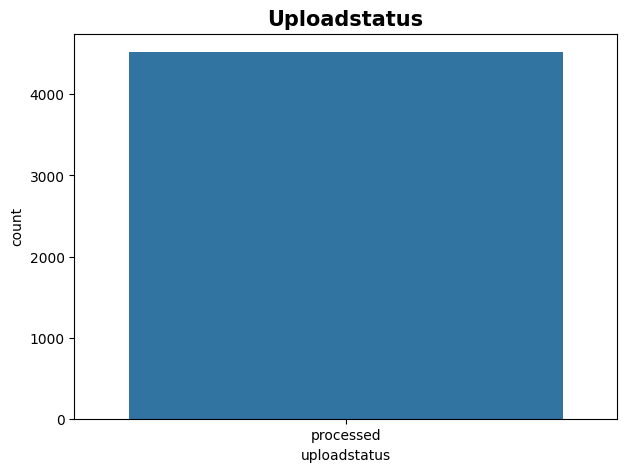

Values count for license
youtube           0.999558
creativeCommon    0.000442
Name: count, dtype: float64


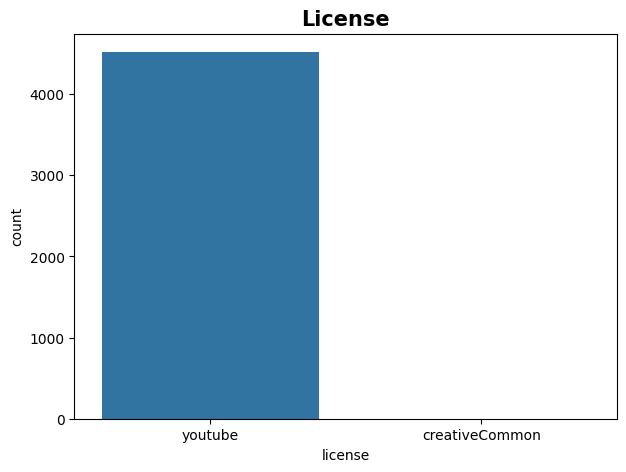

Values count for embeddable
True     0.967935
False    0.032065
Name: count, dtype: float64


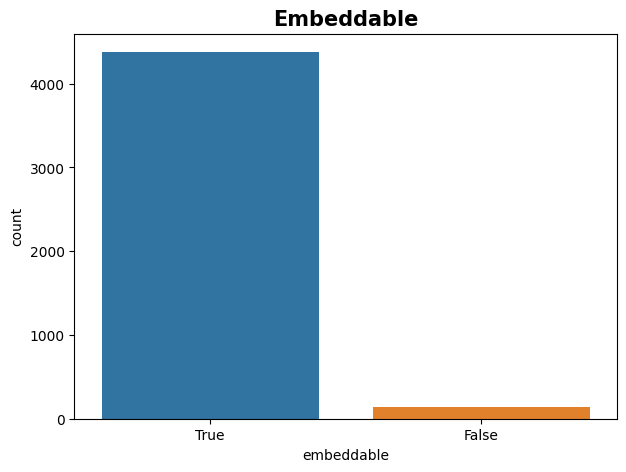

Values count for publicstatsviewable
True     0.847192
False    0.152808
Name: count, dtype: float64


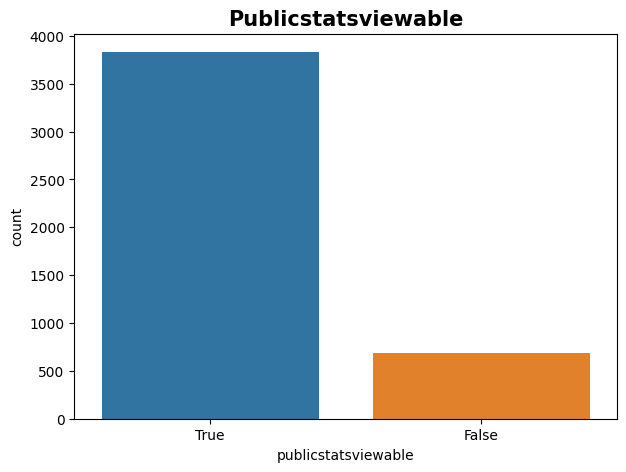

Values count for madeforkids
False    0.814684
True     0.185316
Name: count, dtype: float64


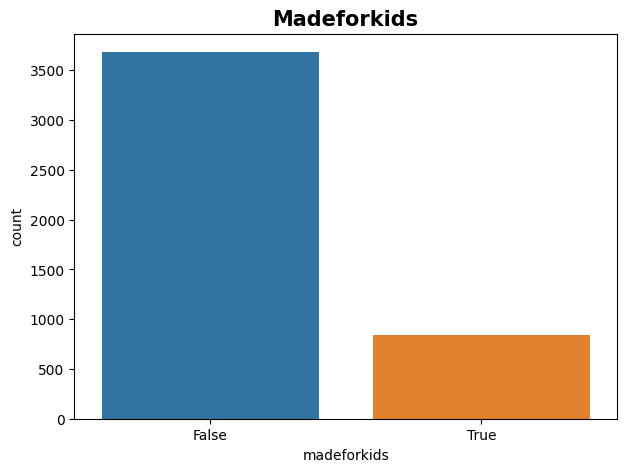

Values count for definition
hd    0.959531
sd    0.040469
Name: count, dtype: float64


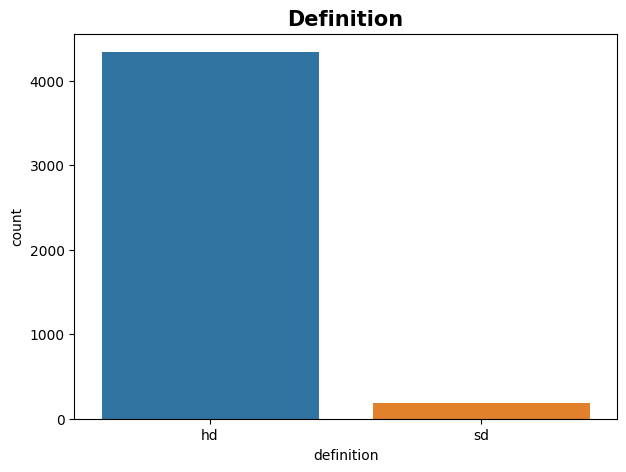

Values count for caption
False    0.742813
True     0.257187
Name: count, dtype: float64


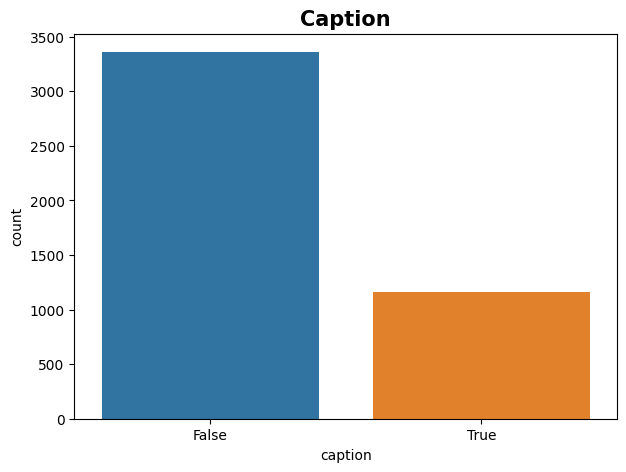

Values count for licensedcontent
True     0.808713
False    0.191287
Name: count, dtype: float64


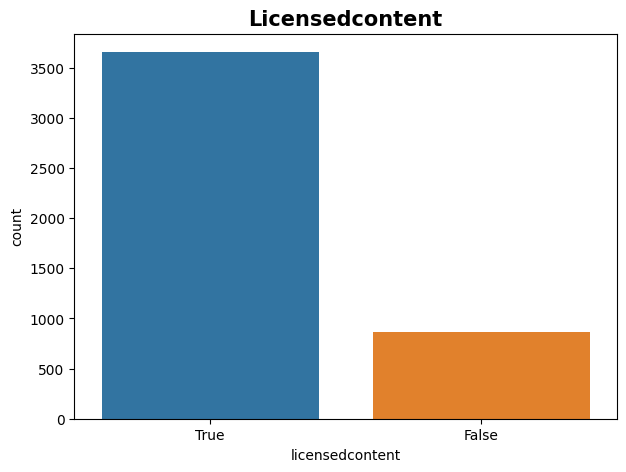

Values count for contentrating
{}                                 0.994471
{'ytRating': 'ytAgeRestricted'}    0.005529
Name: count, dtype: float64


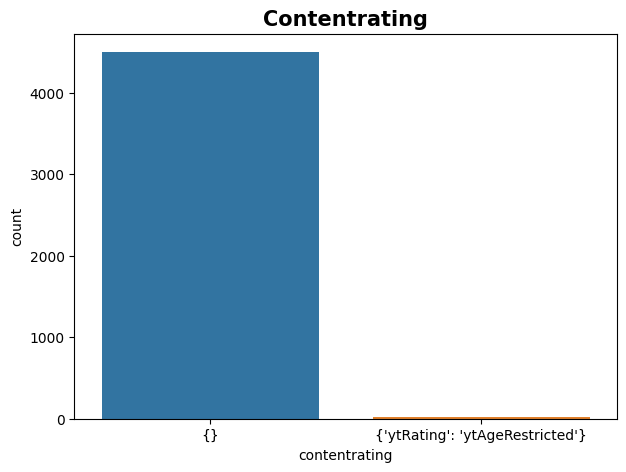

In [32]:
for col in categorical_columns:
    print(f"Values count for {df[col].value_counts()/df.shape[0]}")
    set_labels(title=col.capitalize())
    sns.countplot(x=col,data=df)
    plt.show()

## Observation 
- while some of the feature are interesting here, but then the most of the features are unbalanced with one of the class in majority.

- `contentrating` has only has ***0.56%*** of ***agerestricted*** data points.

- `defination` has ***~96%*** of video as ***hd(high defination)*** and only ***~4%*** as ***sd(standard defination)***.

- `embeddable` has ***~97%*** as True and ***~3%*** as False.

- ***99.95%*** of `license` are from ***youtube*** and only a small amount of ***0.04%*** from ***creativeCommon***. 

- `uploadstatus` has only one class that means zero variance, though in our earlier analysis it had two class but after removal of records with duration=0 it is left with one class.


- We will drop these columns.



In [33]:
def drop_feature(feature,categorical=False):

    """
    function drop column from dataframe and also remove from columns list

    """

    df.drop(feature,axis=1,inplace=True)
    if categorical:
        categorical_columns.remove(feature)
        return None
    numerical_columns.remove(feature)
    return None

In [34]:
df.columns

Index(['uploadstatus', 'license', 'embeddable', 'publicstatsviewable',
       'madeforkids', 'viewcount', 'likecount', 'commentcount', 'duration',
       'definition', 'caption', 'licensedcontent', 'contentrating'],
      dtype='object')

In [35]:
## droping columns from above analysis

unbalanced_cols = ['contentrating','definition','embeddable','license','uploadstatus']
for col in unbalanced_cols:
    drop_feature(feature=col,categorical=True)


print(f"shape after drop: {df.shape}")

shape after drop: (4522, 8)


### Numerical Columns

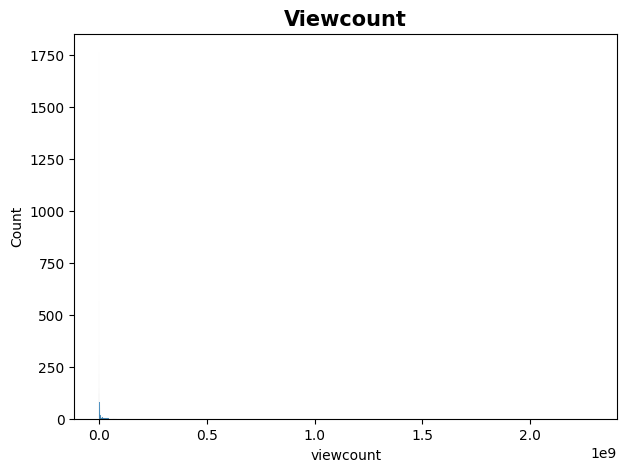

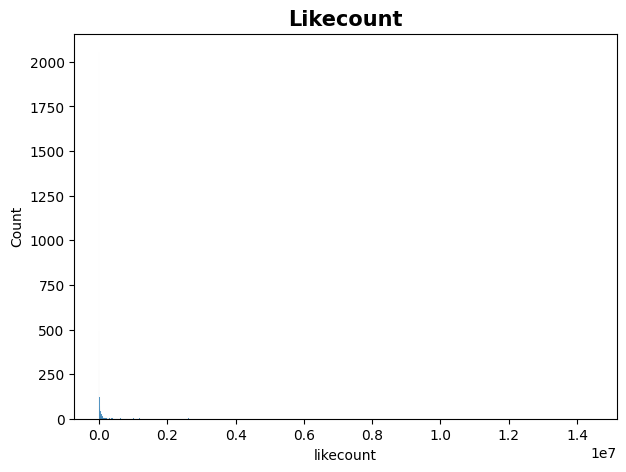

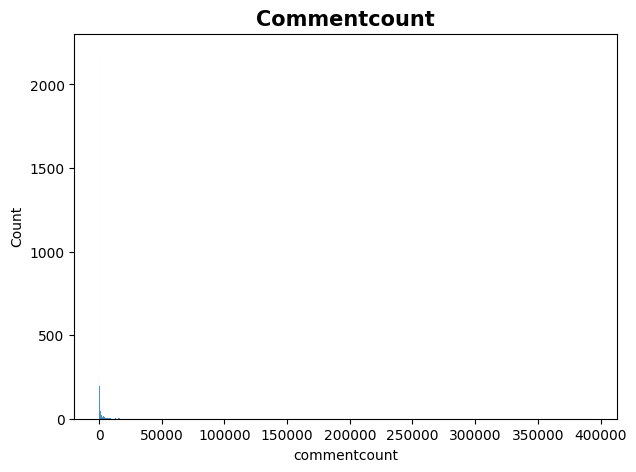

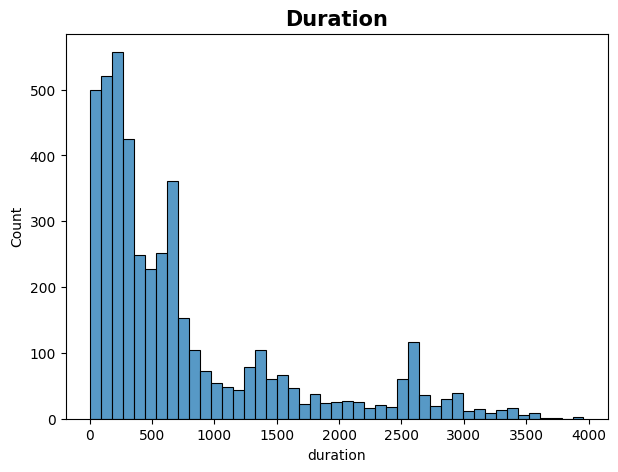

In [36]:
for col in numerical_columns:
    set_labels(title=col.capitalize())
    sns.histplot(data=df,x=col)
    plt.show()

## Observation
- for columns `viewcount`, `likecount`, `commentcount` we have very skewed, as the values are ranges from 0 upto 10^9 for `viewcount`, which also make sense as these are the indicators of the interaction with the content and are real in nature.

- We would scale these features to reduce the damage, as forming clusters on these variables will be difficult due the nature of the data.

- for `duration` column short videos within range of some seconds to 4-5 mins are in majority.

## Multivariate Analysis


/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/93/mr9vk9s104n71qvsfvrkf4800000gn/T/ipykernel_28269/1558833539.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

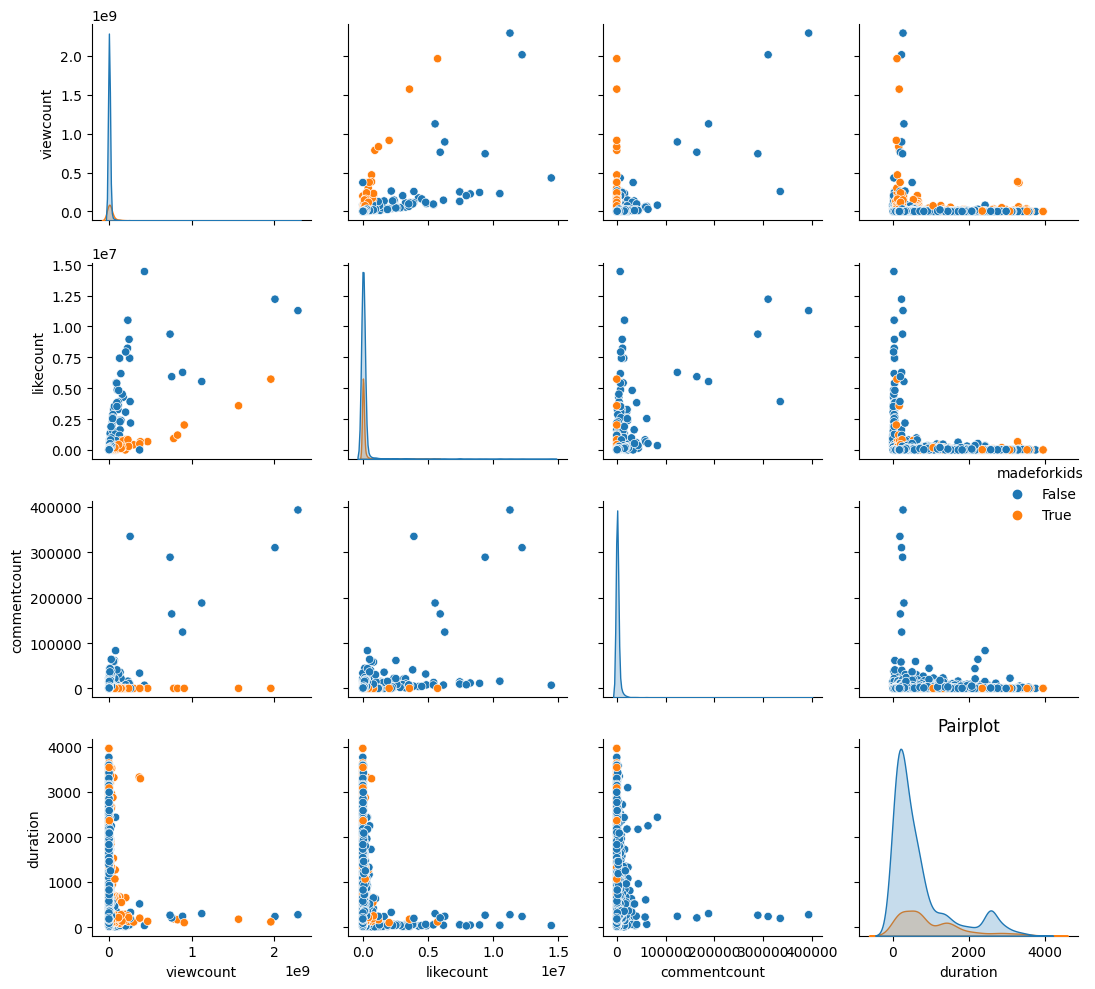

In [37]:
plt.figure()
sns.pairplot(df[numerical_columns+['madeforkids']],hue='madeforkids')
plt.title('Pairplot')

plt.tight_layout()

## Observation 
- `viewcount` and `likecount` are has positive linear relation.

- `viewcount` and `commentcount` show some positive linear relation, but not visible and one of the reason is that comment are very few compared to views.

- for `duration` column we can see that with little exception, all the three interaction are high on short videos, and we can conclude that short video are more popular.

## Outliers

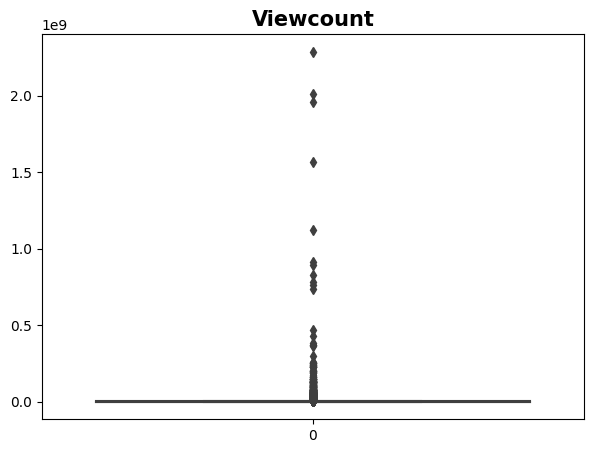

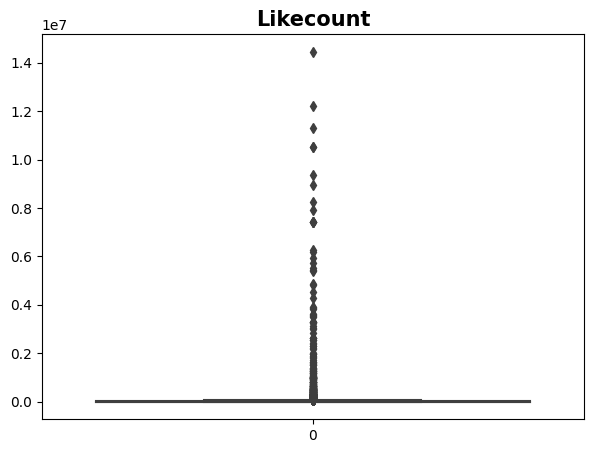

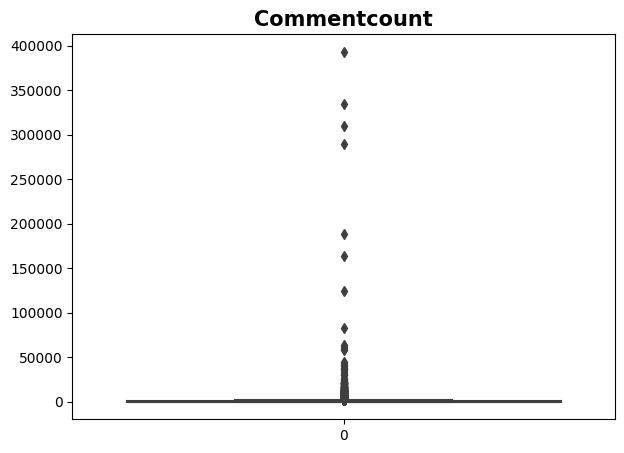

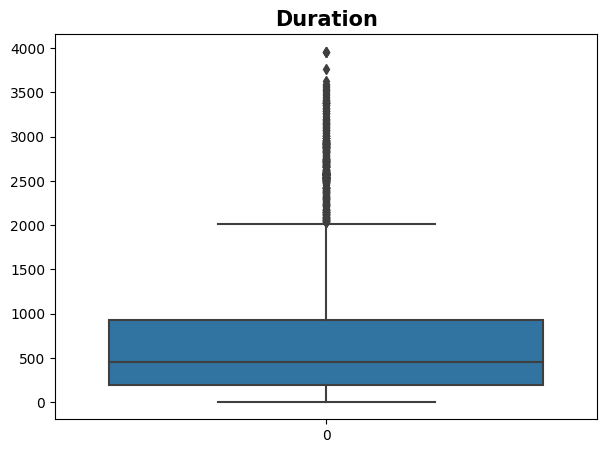

In [38]:
for col in numerical_columns:
    set_labels(title=col.capitalize())
    sns.boxplot(df[col])
    plt.show()

## Observation
- We discused above the range for columns `viewcount`, `likecount`, `commentcount` are very high, although these are natural existing values we have to remove some of the outlier values. As will help in clustering analysis.

In [39]:
## dumb the data before outlier removal, to be used for regression
if SELECTED_DATA:
    df.to_csv("selected_data",index=False)


## Outlier removal 


shape before removing outlier: (4522, 8)

651
shape after removing outlier for viewcount: (3871, 8)


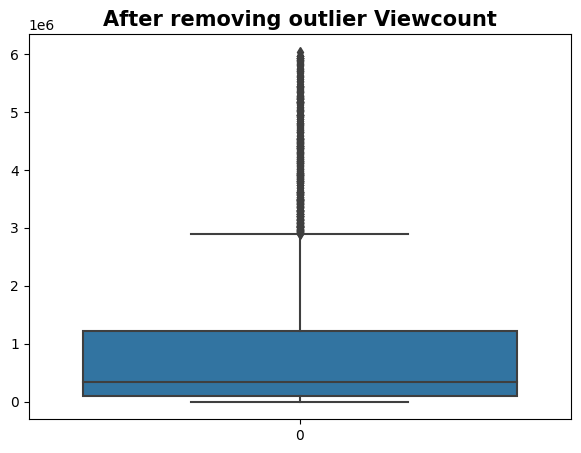

shape before removing outlier: (3871, 8)

552
shape after removing outlier for likecount: (3319, 8)


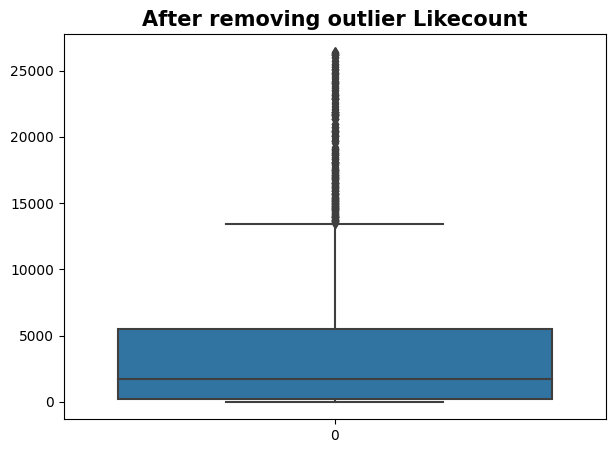

shape before removing outlier: (3319, 8)

305
shape after removing outlier for commentcount: (3014, 8)


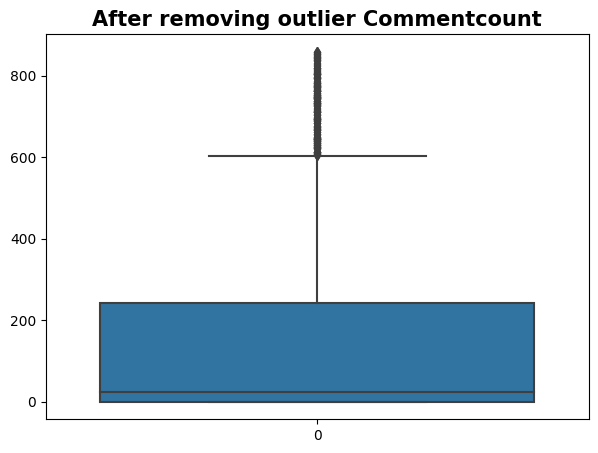

shape before removing outlier: (3014, 8)

121
shape after removing outlier for duration: (2893, 8)


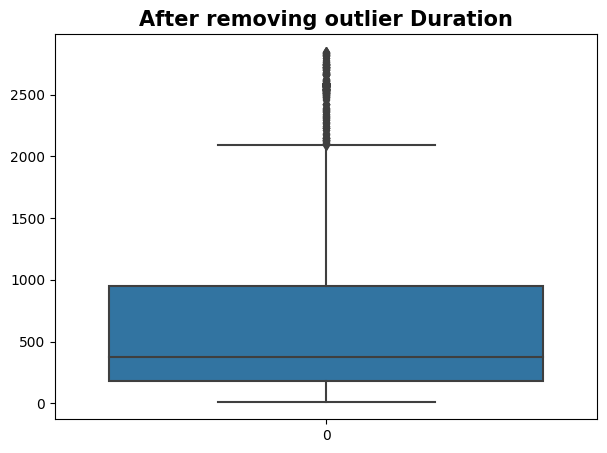

In [40]:
def detect_outlier(col,data,threshold=1.5):
    q1 = np.percentile(q=25,a=data[col],axis=0)
    q3 = np.percentile(q=75,a=data[col],axis=0)
    iqr = q3-q1
    lower_bound = q1-(threshold*iqr)
    upper_bound = q3 + (threshold*iqr)

    print(len(data.query(f"{col}>{upper_bound} | {col} < {lower_bound}")))
    data = data.query(f"{col}<{upper_bound} and {col} > {lower_bound}")
    # print(data)
    # sns.boxplot(col)
    # plt.show()
    return data



for col in numerical_columns:

    print(f"shape before removing outlier: {df.shape}\n")
    df = detect_outlier(col=col,data=df,threshold=1.5)


    print(f"shape after removing outlier for {col}: {df.shape}")
    set_labels(title=f"After removing outlier {col.capitalize()}")
    sns.boxplot(df[col])
    plt.show()
# detect_outlier(col='likecount',data=df)


    

## Observation
- We can see there are still some outliers, as the values of upper bound and lower bounds gets as per the new available records. But we will not aggresively remove these outlier and live with it as it may result in huge data loss.

In [41]:
## selected columns
print(f"Columns Selected:\n{df.columns}")
print(f"no of columns: {df.shape[1]}")

Columns Selected:
Index(['publicstatsviewable', 'madeforkids', 'viewcount', 'likecount',
       'commentcount', 'duration', 'caption', 'licensedcontent'],
      dtype='object')
no of columns: 8


## Data Pipeline

In [42]:
## pipe line
def data_pipeline(categorical_columns,numerical_columns,X_train,X_test=None,split=False):


    numerical_transformer = Pipeline(steps=[
            ('imputation',SimpleImputer(strategy='mean')),
            ('standardization',StandardScaler())
    ])

    categorical_transformer  = Pipeline(steps=[
        ('imputation',SimpleImputer(strategy='most_frequent')),
        ('encoding',OneHotEncoder())
    ])

    pipeline = ColumnTransformer([
        ('numerical',numerical_transformer,numerical_columns),
        ('categorical',categorical_transformer,categorical_columns)
    ]) 
    X_train = pipeline.fit_transform(X_train)
    if split:
        X_test = pipeline.transform(X_test)
        return [X_train,X_test]
    return X_train

## Pre-processing for clustering

In [43]:
X = df[categorical_columns+numerical_columns]
X_transform = data_pipeline(categorical_columns,numerical_columns,X_train=X)


print(f"shape of data before tranformation: {X.shape}")

print(f"shape of data after transformation: {X_transform.shape}")

shape of data before tranformation: (2893, 8)
shape of data after transformation: (2893, 12)


## Observation
- Using ***PCA (Principal component analysis)*** for transforming our data to 2 dimension which could be ploted on a scatterplot for analysis of clusters.

## PCA

In [44]:

X_2d = PCA(n_components=2,random_state=0).fit_transform(X_transform)
print(f"shape of X_2d: {X_2d.shape}")
print(f"type of X_2d: {type(X_2d)}")


X_2d = pd.DataFrame(X_2d)

shape of X_2d: (2893, 2)
type of X_2d: <class 'numpy.ndarray'>


## Clustering

### KMeans

#### Baseline Model 
- no_of_clusters = 3

In [45]:
## no of clusters = 3

kmeans = KMeans(n_clusters=3,random_state=0)

kmeans.fit(X_transform)
X_2d['c'] = kmeans.predict(X_transform)

/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: title={'center': 'No of clusters=3'}, xlabel='0', ylabel='1'>

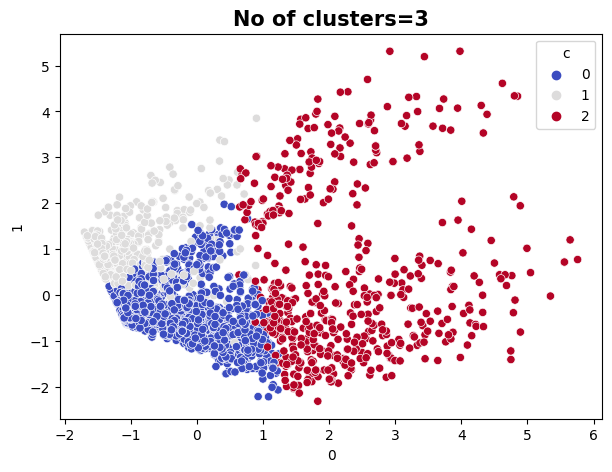

In [46]:
set_labels(title='No of clusters=3')
sns.scatterplot(x=0,y=1,data=X_2d,hue='c',palette='coolwarm')

## Observation
- ***KMeans*** algorithm is very sensitive to outlier as it uses Euclidean distance to measure distance between points and form clusters.

- As seen above, the extereme values are classified as a seperate group. 

/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input

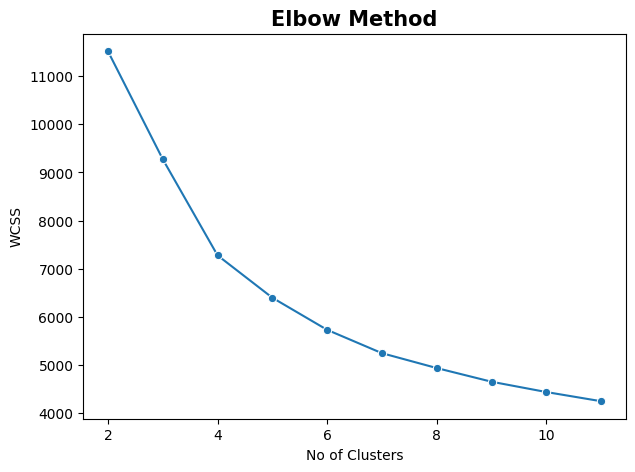

In [47]:
def no_of_clusters(data,min_cluster=2,max_cluster=8):
    wcss = []
    for i in range(min_cluster,max_cluster):
        km = KMeans(n_clusters=i,random_state=0,init = 'k-means++',verbose=0).fit(data)
        
        wcss.append(km.inertia_)
    ## ploting 
    
    set_labels(title='Elbow Method',xlabel='No of Clusters',ylabel='WCSS')
    sns.lineplot(x=np.arange(min_cluster,max_cluster),y=wcss,marker='o')

no_of_clusters(data=X_transform,max_cluster=12)
    

- No of clusters = 4

/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.3246118566328049


/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.300827419266658


/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.32120146782077763


/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.28592380642647924


/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.2761349213580669


/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.28698730059457556


/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is : 0.2996551217567274


/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is : 0.30178135575302883


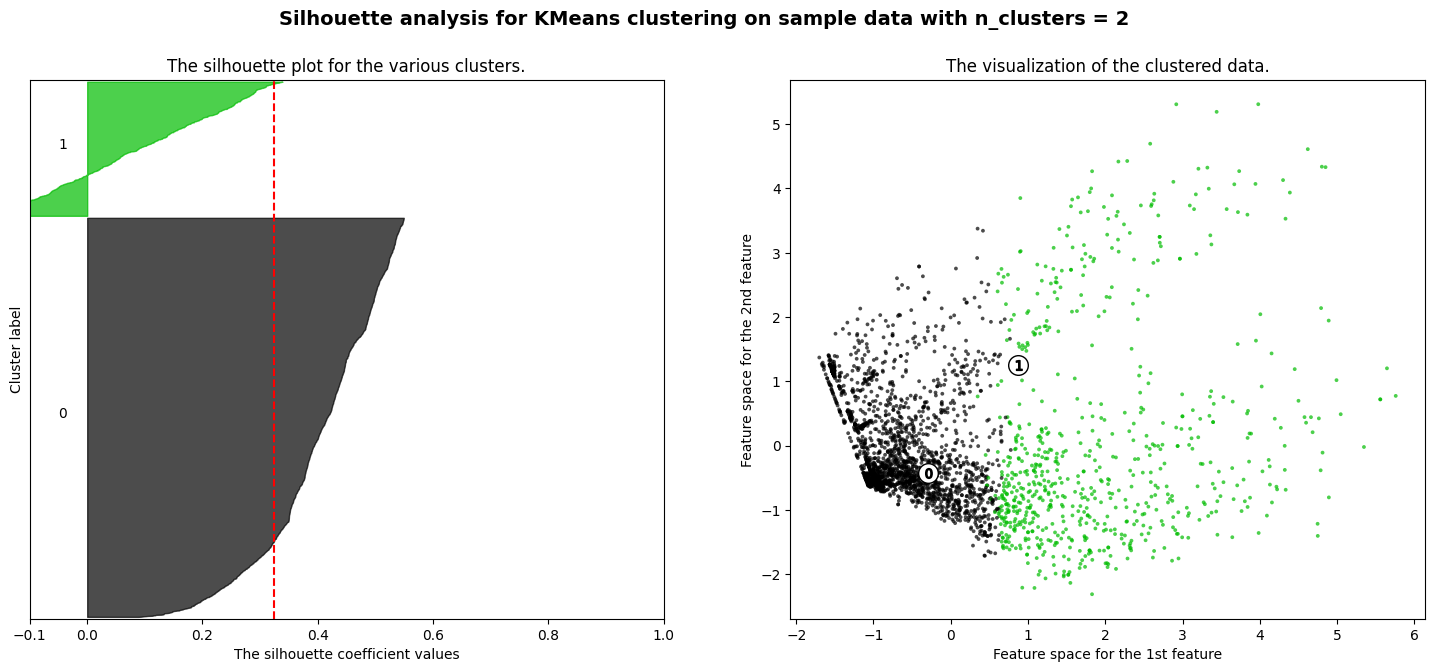

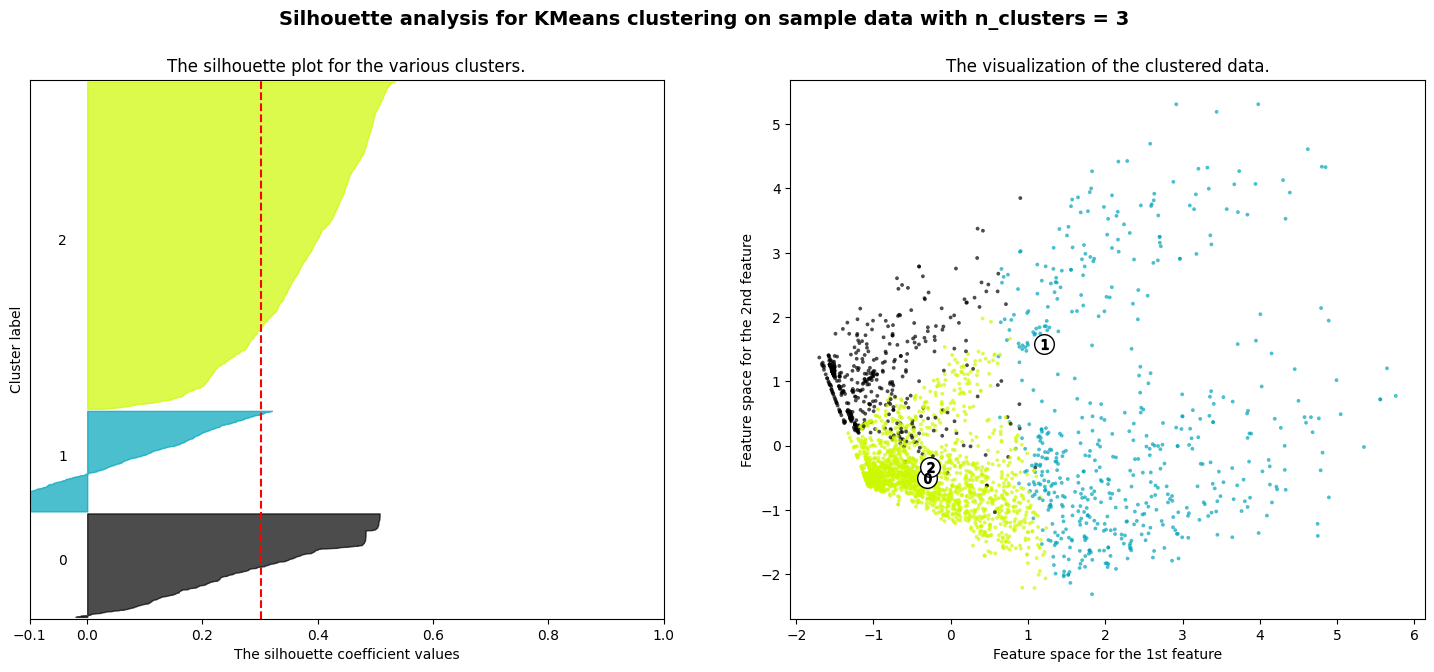

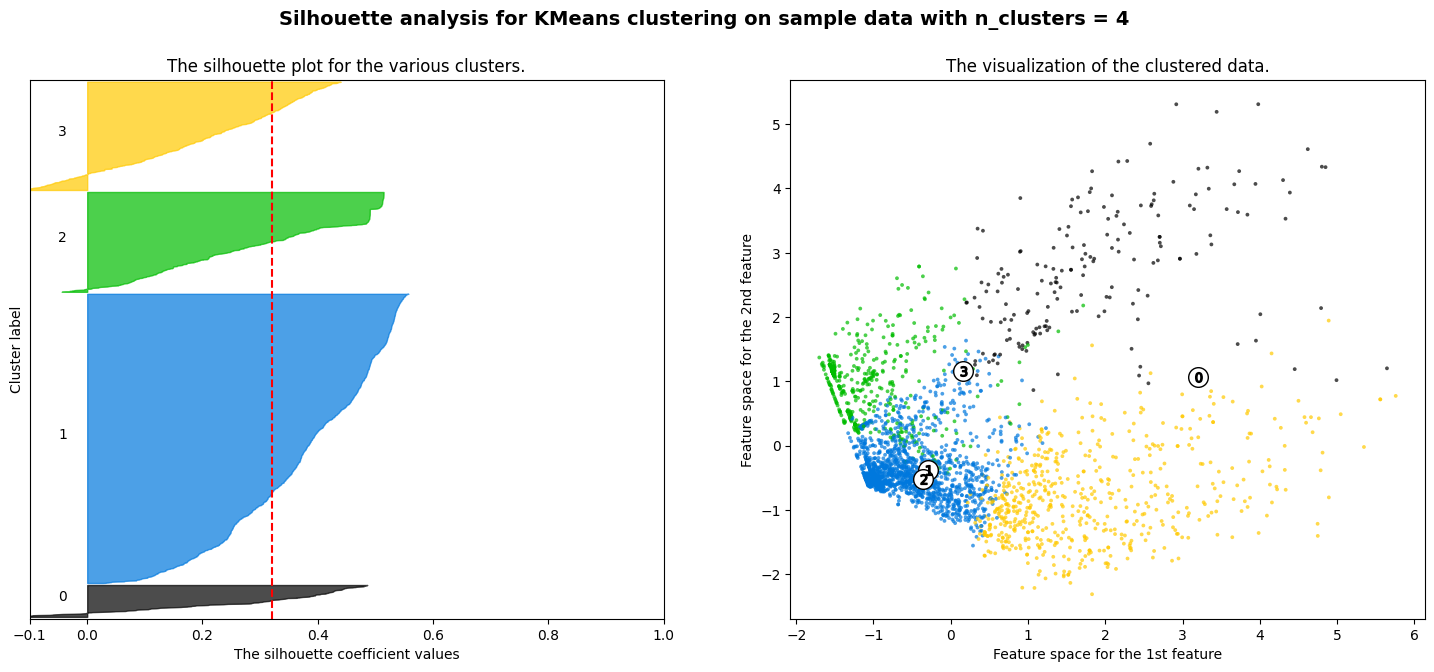

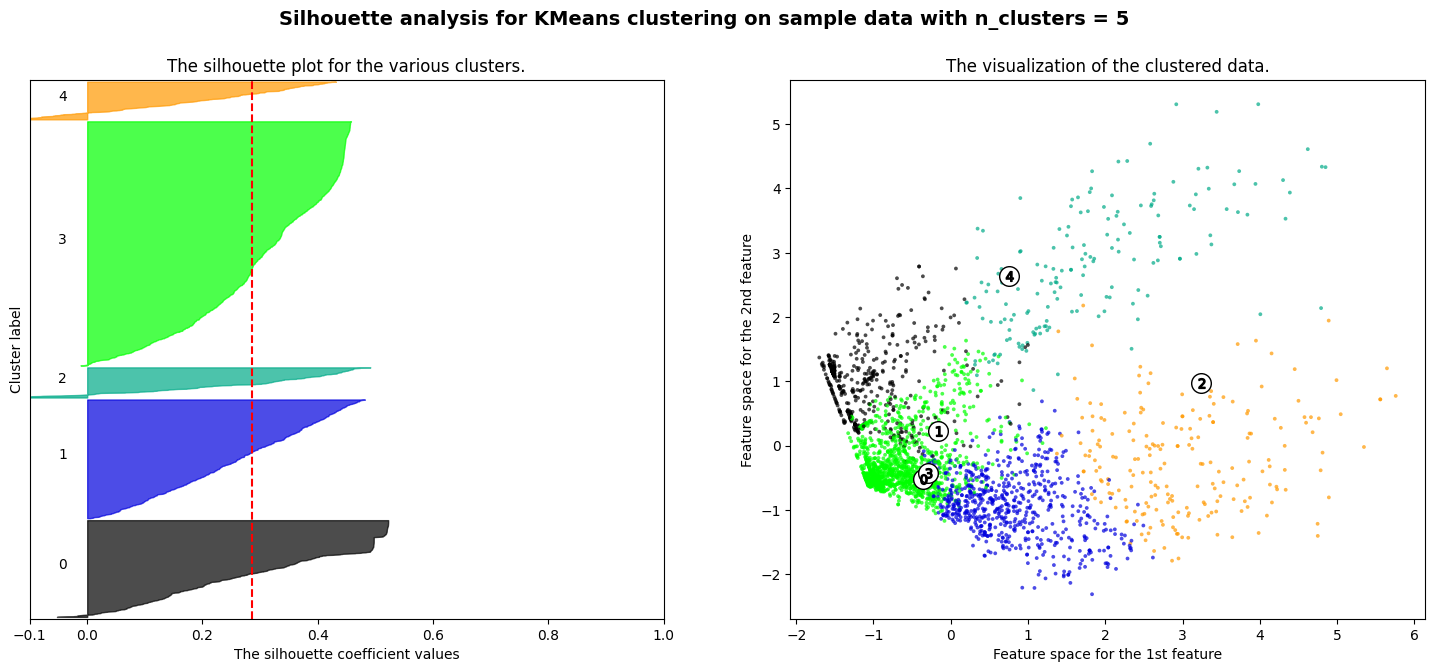

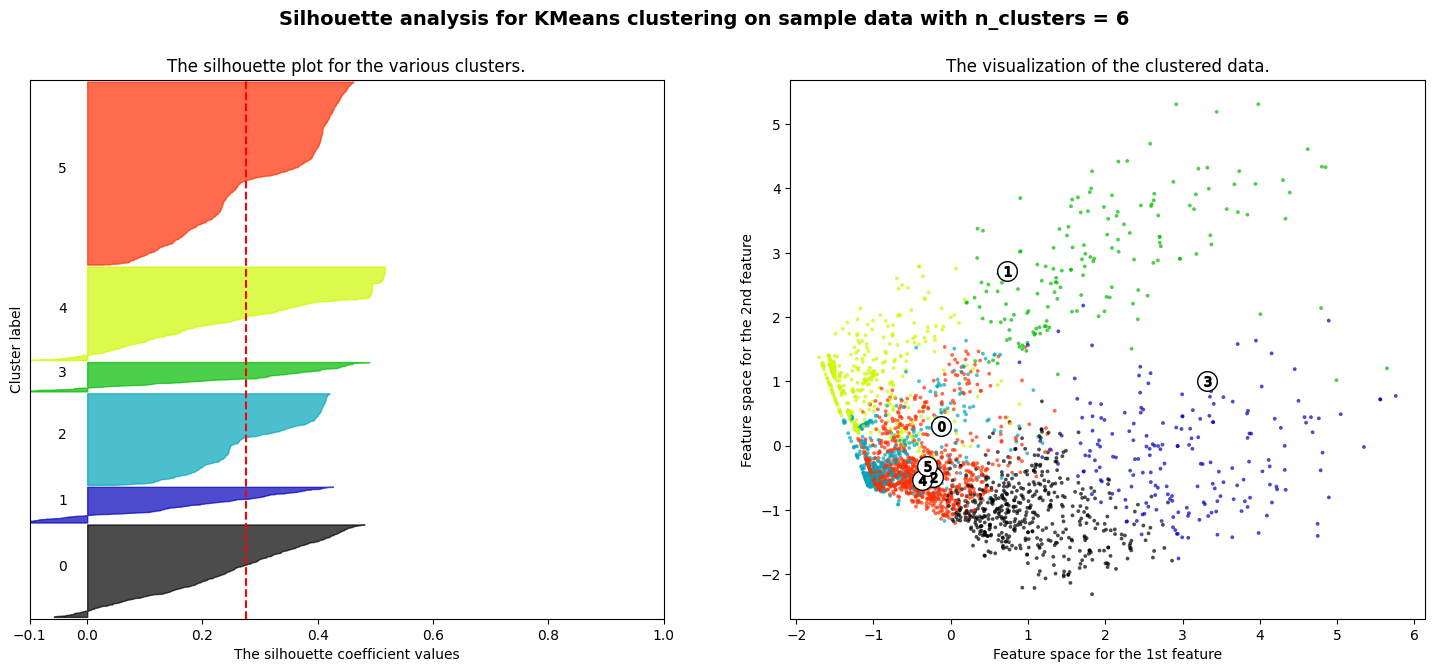

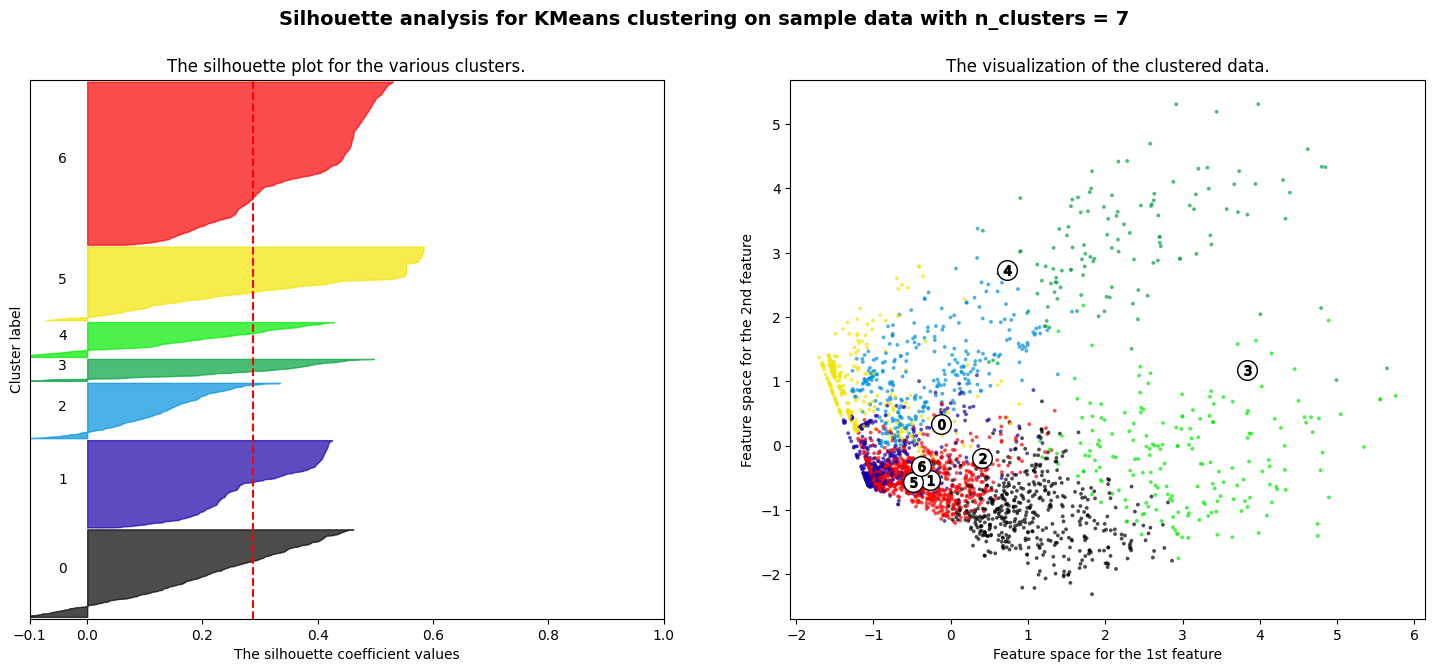

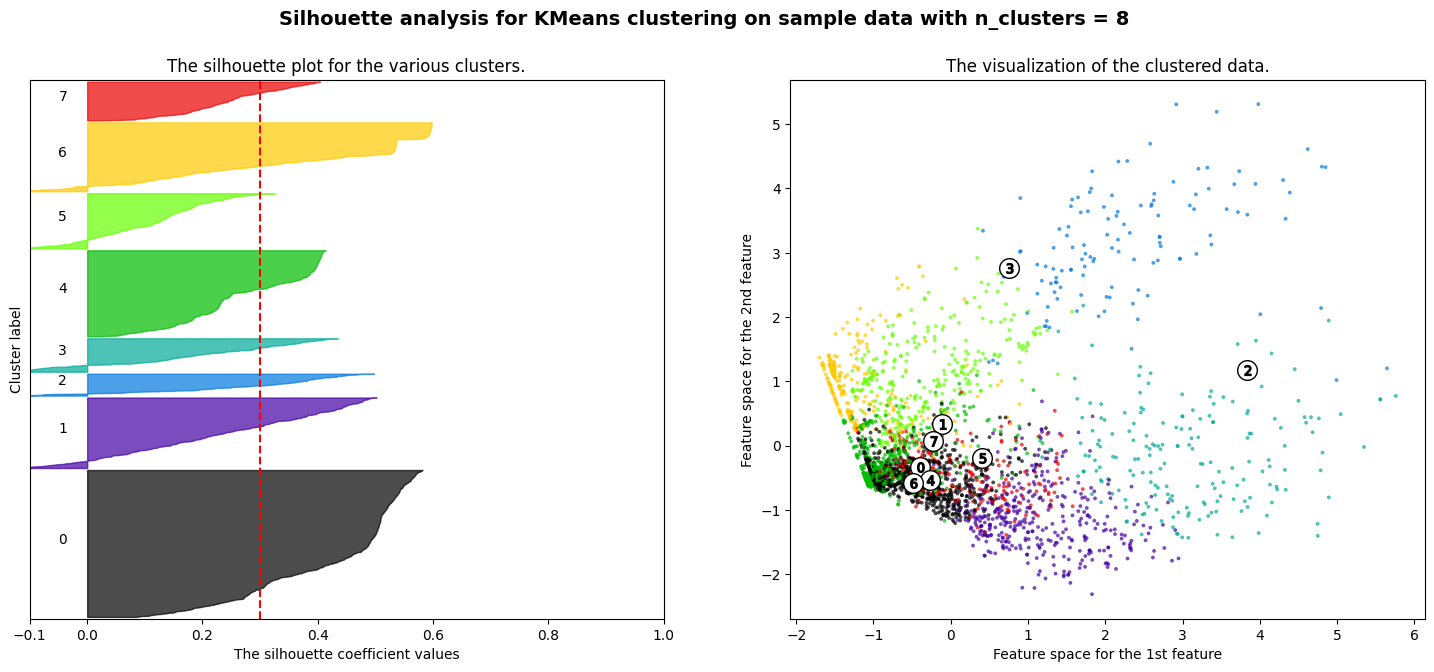

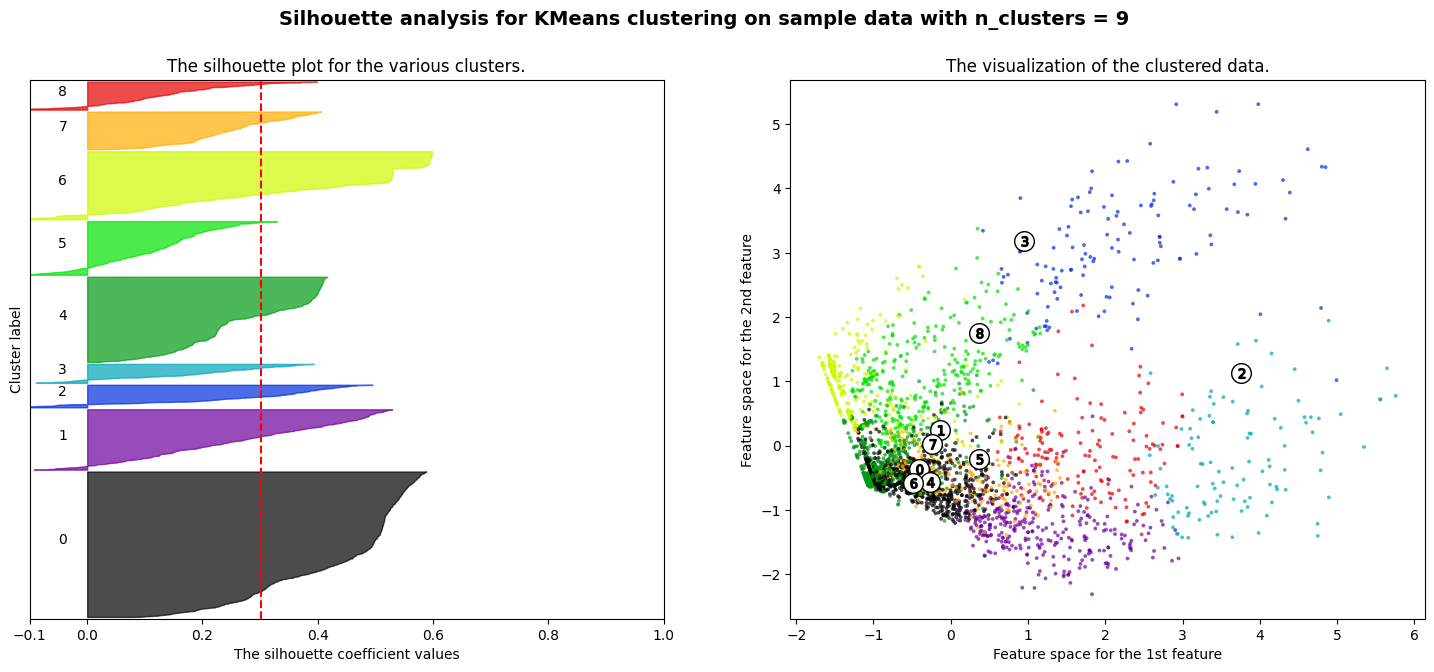

In [48]:

def silhouette_analysis(range_n_clusters):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X_transform)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X_transform, cluster_labels)
        print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X_transform, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_2d[0],X_2d[1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                    "with n_clusters = %d" % n_clusters),
                    fontsize=14, fontweight='bold')

    plt.show()
range_n_clusters = [2,3,4,5,6,7,8,9]
silhouette_analysis(range_n_clusters)

## Observation
- We see that in the ***silhoutte plots***, there are ***negative values*** for all the selected no_of_clusters and this is due to the no of outliers in the data, although we have removed outlier with ***threshold=1.5*** and the result have significantly improved as compared to the raw data, but there are still some outliers present the feature and since this is a real data, aggressively removing all the outlier will cause substantial data loss and will effect our analysis. Hence we will with some outliers.

- From the above cluster, for no_of_clusters=2 and no_of_clusters=4 we have silhoutte score of .3246 and .3212 respectively which are very close, in these scenario we should always select the greater no_of_clusters=4 to avoid overfitting, and even our elbow method return the same results. Therefore we will be moving with ***4 no_of_clusters.***

#### Final Model

/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: title={'center': 'Final Clusters with no_of_clusters=4'}, xlabel='0', ylabel='1'>

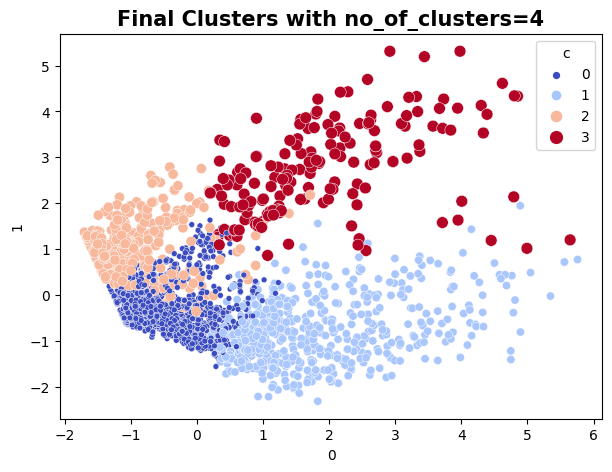

In [49]:
km = KMeans(n_clusters=4,random_state=0)
X_2d['c'] = km.fit_predict(X_transform)
df['bins'] = km.fit_predict(X_transform)


set_labels(title="Final Clusters with no_of_clusters=4")
sns.scatterplot(x=0,y=1,data=X_2d,hue='c',size='c',palette='coolwarm')

## Observation 
- from above created bins we will develop a classification model.

## Classification

In [50]:
## dependent and independent variables
X = df.drop('bins',axis=1)
y = df['bins']

print(f"shape of X: {X.shape}")
print(f"shape of y: {y.shape}")


shape of X: (2893, 8)
shape of y: (2893,)


## Train test split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,stratify=y)

print(f"shape of X_train: {X_train.shape}")
print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_train: {y_train.shape}")
print(f"shape of y_test: {y_test.shape}")



shape of X_train: (2025, 8)
shape of X_test: (868, 8)
shape of y_train: (2025,)
shape of y_test: (868,)


## Pre-processing for Classification

In [53]:

[X_train_transfrom,X_test_transform] = data_pipeline(categorical_columns,numerical_columns,X_train,X_test,split=True)


print(f"shape of X_train: {X_train.shape}")
print(f"shape of X_test: {X_test.shape}\n")
print(f"shape of X_train_transform: {X_train_transfrom.shape}")
print(f"shape of X_test_transform: {X_test_transform.shape}")



shape of X_train: (2025, 8)
shape of X_test: (868, 8)

shape of X_train_transform: (2025, 12)
shape of X_test_transform: (868, 12)


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

In [59]:
def evaluation_classification(y_pred, y_test,model):
    """
    y_pred: predicted values
    y_test: true values
    """
    print(f"{model}")
    print(f"Accuracy Score: {accuracy_score(y_pred,y_test)}")
    print(f"Classification Report: \n{classification_report(y_pred,y_test)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_pred,y_test)}")

    set_labels(title=f'Confusion Matrix for {model}')
    sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)
    plt.show()
    


## Logistic Regression


train data evaluation:

LogisticRegression
Accuracy Score: 0.9920987654320987
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1111
           1       0.98      1.00      0.99       410
           2       1.00      0.99      1.00       385
           3       0.96      0.98      0.97       119

    accuracy                           0.99      2025
   macro avg       0.98      0.99      0.99      2025
weighted avg       0.99      0.99      0.99      2025

Confusion Matrix: 
[[1101    7    0    3]
 [   0  408    0    2]
 [   2    0  383    0]
 [   1    1    0  117]]


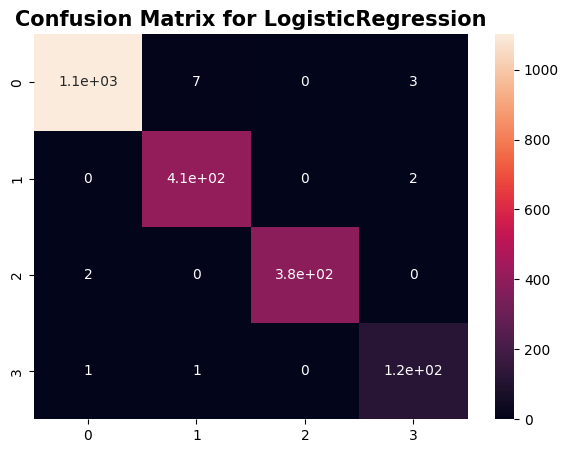

test data evaluation:

Logistic Regression
Accuracy Score: 0.9850230414746544
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       476
           1       0.97      1.00      0.99       173
           2       0.99      0.97      0.98       167
           3       0.96      0.98      0.97        52

    accuracy                           0.99       868
   macro avg       0.98      0.98      0.98       868
weighted avg       0.99      0.99      0.99       868

Confusion Matrix: 
[[469   5   1   1]
 [  0 173   0   0]
 [  4   0 162   1]
 [  0   0   1  51]]


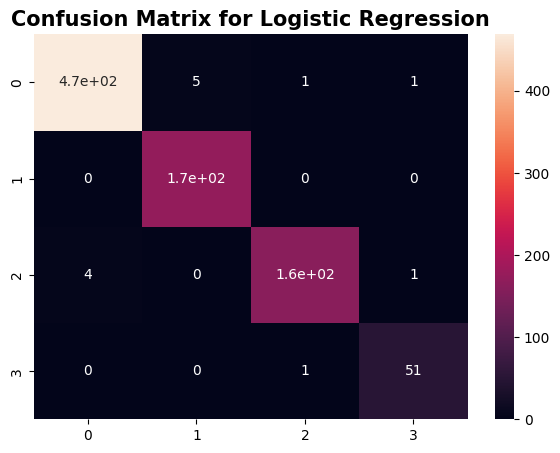

In [60]:
## create an object
logr = LogisticRegression(random_state=0)

## train the model
logr.fit(X_train_transfrom,y_train)

## train predict
train_pred_logr = logr.predict(X_train_transfrom)
print(f"train data evaluation:\n")
evaluation_classification(train_pred_logr,y_train,model='LogisticRegression')

## prediction

y_pred_logr = logr.predict(X_test_transform)
print(f"test data evaluation:\n")
evaluation_classification(y_pred_logr,y_test,model='Logistic Regression')

## Decision Tree Classifier

train data evaluation:
 
DecisionTreeClassifier
Accuracy Score: 1.0
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1104
           1       1.00      1.00      1.00       416
           2       1.00      1.00      1.00       383
           3       1.00      1.00      1.00       122

    accuracy                           1.00      2025
   macro avg       1.00      1.00      1.00      2025
weighted avg       1.00      1.00      1.00      2025

Confusion Matrix: 
[[1104    0    0    0]
 [   0  416    0    0]
 [   0    0  383    0]
 [   0    0    0  122]]


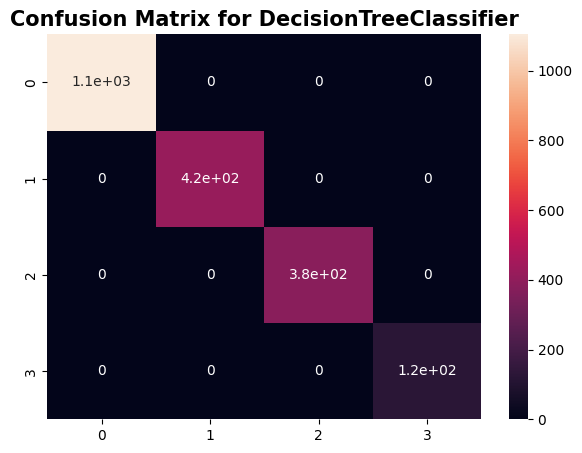

Test data evaluation:

DecisionTreeClassifier
Accuracy Score: 0.967741935483871
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       482
           1       0.93      0.95      0.94       174
           2       0.95      0.98      0.96       158
           3       0.98      0.96      0.97        54

    accuracy                           0.97       868
   macro avg       0.96      0.97      0.96       868
weighted avg       0.97      0.97      0.97       868

Confusion Matrix: 
[[467  10   4   1]
 [  5 166   3   0]
 [  1   2 155   0]
 [  0   0   2  52]]


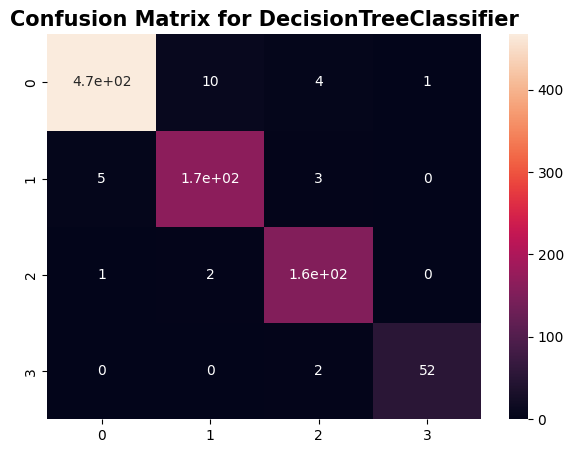

In [61]:
## define the model
dtc = DecisionTreeClassifier(random_state=0)

## train the model
dtc.fit(X_train_transfrom,y_train)

## training prediction
train_pred_dtc = dtc.predict(X_train_transfrom)


print(f"train data evaluation:\n ")
evaluation_classification(train_pred_dtc,y_train,model='DecisionTreeClassifier')

## test prediction
y_pred_dtc = dtc.predict(X_test_transform)

print(f"Test data evaluation:\n")
evaluation_classification(y_pred_dtc,y_test,model='DecisionTreeClassifier')



## Random Forest Classifier 

train data evaluation: 

RandomForestClassifier
Accuracy Score: 1.0
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1104
           1       1.00      1.00      1.00       416
           2       1.00      1.00      1.00       383
           3       1.00      1.00      1.00       122

    accuracy                           1.00      2025
   macro avg       1.00      1.00      1.00      2025
weighted avg       1.00      1.00      1.00      2025

Confusion Matrix: 
[[1104    0    0    0]
 [   0  416    0    0]
 [   0    0  383    0]
 [   0    0    0  122]]


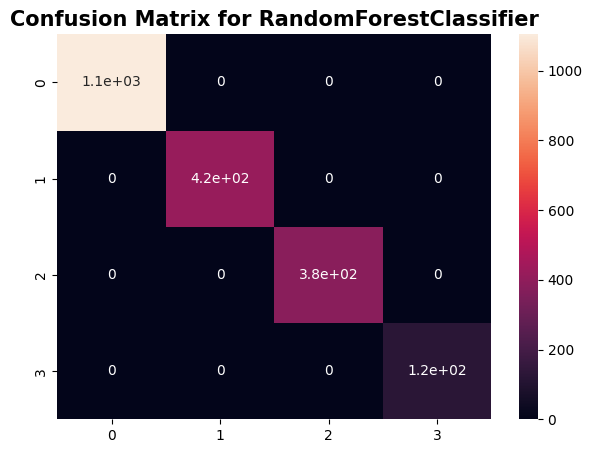

test data evaluation: 

RandomForestClassifier
Accuracy Score: 0.9827188940092166
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       478
           1       0.97      0.97      0.97       177
           2       0.98      0.99      0.98       162
           3       0.96      1.00      0.98        51

    accuracy                           0.98       868
   macro avg       0.97      0.99      0.98       868
weighted avg       0.98      0.98      0.98       868

Confusion Matrix: 
[[470   5   2   1]
 [  2 172   2   1]
 [  1   1 160   0]
 [  0   0   0  51]]


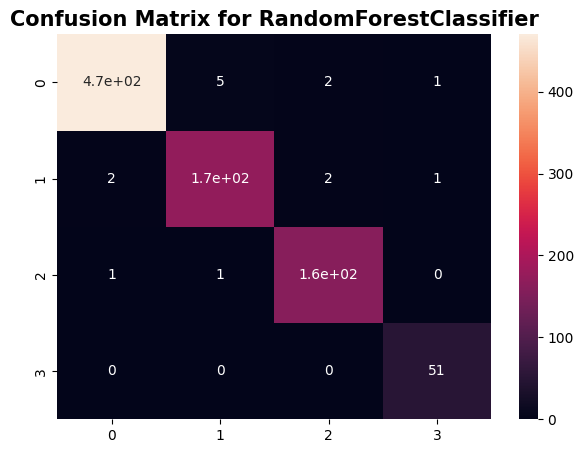

In [62]:
## define the model
rfc = RandomForestClassifier(random_state=0)

## train the model
rfc.fit(X_train_transfrom,y_train)

## train predict
train_pred_rfc = rfc.predict(X_train_transfrom)
print(f"train data evaluation: \n")
evaluation_classification(train_pred_rfc,y_train,model='RandomForestClassifier')

## test predict
y_pred_rfc = rfc.predict(X_test_transform)
print(f"test data evaluation: \n")
evaluation_classification(y_pred_rfc,y_test,model='RandomForestClassifier')

## Observation
- `LogisticRegression` got a training accuracy of .9920 and test accuracy of .9850 .

- `DecisionTreeClassifier` got a training accuracy of 1.0 and test accuracy of .9677 .

- `RandomForestClassifier` got a training accuracy of 1.0 and test accuracy of .9827 .

- One of the reasons for all these high accuracy score is that, the target bins we are classifying here were generated from the same features hence the predictors are highly correlated to the target which results in all these high scores.


# Regression

In [63]:
## read data that was saved before removing outlier 

df = pd.read_csv('selected_data')



In [64]:
df.head()

,publicstatsviewable,madeforkids,viewcount,likecount,commentcount,duration,caption,licensedcontent
0,True,False,5392,166,1,132,False,True
1,True,False,3805,102,32,1506,False,True
2,True,False,29986,2171,385,636,False,True
3,True,False,2084,40,0,182,False,True
4,True,False,120380,874,3,734,False,True


In [65]:
df.tail()

,publicstatsviewable,madeforkids,viewcount,likecount,commentcount,duration,caption,licensedcontent
4517,False,False,3838678,73605,5021,2082,False,True
4518,True,False,3807856,113732,2315,720,False,True
4519,True,False,1482434,17484,938,822,False,True
4520,False,False,558352,3410,203,179,True,True
4521,True,False,3626419,18355,816,2581,False,True


In [66]:
df.columns

Index(['publicstatsviewable', 'madeforkids', 'viewcount', 'likecount',
       'commentcount', 'duration', 'caption', 'licensedcontent'],
      dtype='object')

In [67]:
df.dtypes

publicstatsviewable     bool
madeforkids             bool
viewcount              int64
likecount              int64
commentcount           int64
duration               int64
caption                 bool
licensedcontent         bool
dtype: object

In [68]:
for col in ['publicstatsviewable','madeforkids','caption','licensedcontent']:
    df[col] = df[col].map({True:'True',False:'False'})

In [69]:
print(f"categorical_columns: \n{categorical_columns}")
print(f"numerical_columns:\n {numerical_columns}")

categorical_columns: 
['publicstatsviewable', 'madeforkids', 'caption', 'licensedcontent']
numerical_columns:
 ['viewcount', 'likecount', 'commentcount', 'duration']


## Observation
- Remove `viewcount` from numerical_columns list as it will be our target column for regression.

In [70]:
numerical_columns.remove('viewcount')


shape before removing outlier: (4522, 8)

673
shape after removing outlier for likecount: (3849, 8)


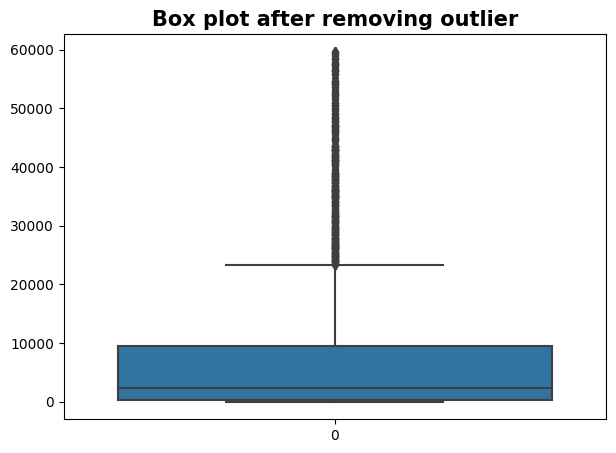

shape before removing outlier: (3849, 8)

426
shape after removing outlier for commentcount: (3423, 8)


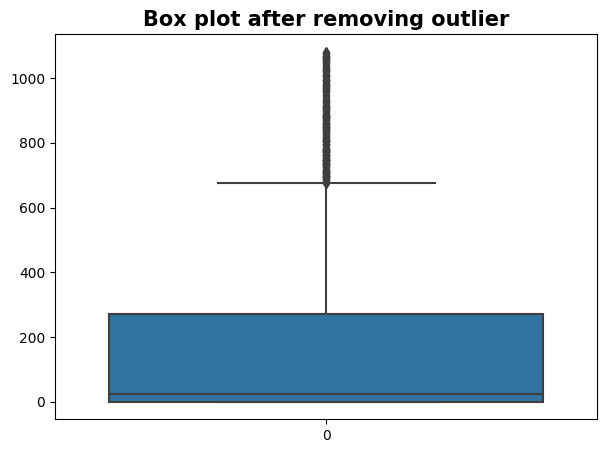

shape before removing outlier: (3423, 8)

211
shape after removing outlier for duration: (3212, 8)


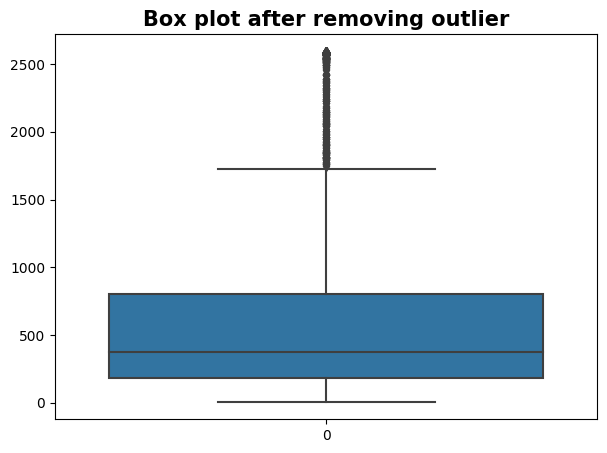

In [71]:
## outlier removal 
for col in numerical_columns:

    print(f"shape before removing outlier: {df.shape}\n")
    df = detect_outlier(col=col,data=df,threshold=1.5)


    print(f"shape after removing outlier for {col}: {df.shape}")
    set_labels(title='Box plot after removing outlier')
    sns.boxplot(df[col])
    plt.show()

## Pre-processing for regression

In [72]:
## defining independent and dependent features
X = df.drop('viewcount',axis=1)   
y = df['viewcount']

print(f"shape of X: {X.shape}")
print(f"shape of y: {y.shape}")


shape of X: (3212, 7)
shape of y: (3212,)


## Train Test Split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [74]:
[X_train_transfrom,X_test_transform] = data_pipeline(categorical_columns,numerical_columns,X_train,X_test,split=True)

print(f"shape of X_train: {X_train.shape}")
print(f"shape of X_train_transform: {X_train_transfrom.shape}\n")
print(f"shape of X_test: {X_test.shape}")
print(f"shape of X_test_transform: {X_train_transfrom.shape}")




shape of X_train: (2248, 7)
shape of X_train_transform: (2248, 11)

shape of X_test: (964, 7)
shape of X_test_transform: (2248, 11)


In [75]:
from sklearn.linear_model import LinearRegression,ridge_regression,RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [76]:
def evaluation_regression(y_pred,y_test,model):
    print(f"{model}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_pred,y_test)}\n")
    print(f"Mean Squared Error: {mean_squared_error(y_pred,y_test)}\n")
    print(f"Root Mean Squared Error: {math.sqrt(mean_squared_error(y_pred,y_test))}\n")
    print(f"R2 Score: {r2_score(y_test,y_pred)}\n")



## Linear Regression

In [77]:
## define the model
linr = LinearRegression()

## train the model
linr.fit(X_train_transfrom,y_train)

## predict train data
train_pred_linr = linr.predict(X_train_transfrom)

print(f"train data evaluation:\n")

evaluation_regression(train_pred_linr,y_train,model='LinearRegression')

y_pred_linr = linr.predict(X_test_transform)

print(f"\n\n\ntest data evaluation:\n")

evaluation_regression(y_pred_linr,y_test,model='LinearRegression')

train data evaluation:

LinearRegression
Mean Absolute Error: 1995340.131227758

Mean Squared Error: 19202278290774.895

Root Mean Squared Error: 4382040.425506695

R2 Score: 0.40852628638582034




test data evaluation:

LinearRegression
Mean Absolute Error: 2260824.211618257

Mean Squared Error: 64880784713997.74

Root Mean Squared Error: 8054860.936974501

R2 Score: 0.22329740582929847



## Observation
- The r2_score for train data is .40 and test data is .22, which signify the model is slightly overfitting. We need to add regularization

In [88]:
## define the model

alphas = [0.001,0.01,0.1,1.0,100]
ridCV = RidgeCV(alphas=alphas,cv=4)

## train the model
ridCV.fit(X_train_transfrom,y_train)

## best alpha
print(f"best alpha value: {ridCV.alpha_}")



## predict train data
train_pred_ridCV = ridCV.predict(X_train_transfrom)

print(f"train data evaluation:\n")

evaluation_regression(train_pred_ridCV,y_train,model='RidgeCV')

y_pred_ridCV = ridCV.predict(X_test_transform)

print(f"\n\n\ntest data evaluation:\n")

evaluation_regression(y_pred_ridCV,y_test,model='RidgeCV')

best alpha value: 100.0
train data evaluation:

RidgeCV
Mean Absolute Error: 1898200.0461522231

Mean Squared Error: 19242911613620.47

Root Mean Squared Error: 4386674.322721083

R2 Score: 0.4072746879038056




test data evaluation:

RidgeCV
Mean Absolute Error: 2160813.6388473837

Mean Squared Error: 65313878539333.555

Root Mean Squared Error: 8081700.225777591

R2 Score: 0.21811274138449466



## Observation 
- Even after regularization the model overfits comparing the train and test r2 score, but over all the model underfits with very high rmse error.

## Decision Tree Regressor

In [79]:
dtr = DecisionTreeRegressor()

## train the model
dtr.fit(X_train_transfrom,y_train)

## predict train data
train_pred_dtr = dtr.predict(X_train_transfrom)

print(f"train data evaluation:\n")

evaluation_regression(train_pred_dtr,y_train,model='DecisionTreeRegressor')

y_pred_dtr = dtr.predict(X_test_transform)

print(f"\n\n\ntest data evaluation:\n")

evaluation_regression(y_pred_dtr,y_test,model='DecisionTreeRegressor')

train data evaluation:

DecisionTreeRegressor
Mean Absolute Error: 387.35542704626334

Mean Squared Error: 166962273.34853202

Root Mean Squared Error: 12921.388212902359

R2 Score: 0.9999948571833844




test data evaluation:

DecisionTreeRegressor
Mean Absolute Error: 1186794.518153527

Mean Squared Error: 52716316941149.55

Root Mean Squared Error: 7260600.315480088

R2 Score: 0.36892100945132267



## Observation 
- The model gives and impressive r2 score of .99 for train data, but for the test data data we got an r2 score of .35, which shows the model is a overfit and trying to remember the train data.

In [80]:
dtr1 = DecisionTreeRegressor()
param_grid = { "max_depth":[5,10,15,30],
               "criterion":['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
               "min_samples_split":[2,5,10],
               "min_samples_leaf":[1,2,4,8],
               "max_features":[1,2,4,5],
               "random_state":[1]
}

dtrCV = GridSearchCV(estimator=dtr1,param_grid=param_grid,cv=4,scoring='neg_mean_squared_error')

## fit 
dtrCV.fit(X_train_transfrom,y_train)



GridSearchCV(cv=4, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [5, 10, 15, 30],
                         'max_features': [1, 2, 4, 5],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10], 'random_state': [1]},
             scoring='neg_mean_squared_error')

In [81]:
print(f"{dtrCV.best_estimator_}")
print(f"{dtrCV.best_params_}")
print(f"{dtrCV.best_score_}")

DecisionTreeRegressor(max_depth=10, max_features=5, min_samples_leaf=4,
                      min_samples_split=10, random_state=1)
{'criterion': 'squared_error', 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'random_state': 1}
-9434258718223.469


In [82]:
## predict train data
train_pred_dtrCV = dtrCV.predict(X_train_transfrom)

print(f"train data evaluation:\n")

evaluation_regression(train_pred_dtrCV,y_train,model='DecisionTreeRegressor CV')

y_pred_dtrCV = dtrCV.predict(X_test_transform)

print(f"\n\n\ntest data evaluation:\n")

evaluation_regression(y_pred_dtrCV,y_test,model='DecisionTreeRegressor CV')

train data evaluation:

DecisionTreeRegressor CV
Mean Absolute Error: 709274.156503927

Mean Squared Error: 5329939781875.977

Root Mean Squared Error: 2308666.234403747

R2 Score: 0.83582576877658




test data evaluation:

DecisionTreeRegressor CV
Mean Absolute Error: 1161851.2128871563

Mean Squared Error: 50626510983272.695

Root Mean Squared Error: 7115230.915667649

R2 Score: 0.39393855071490946



## Random Forest Regressor

In [83]:
rfr = RandomForestRegressor(random_state=0)

## train the model
rfr.fit(X_train_transfrom,y_train)

## predict train data
train_pred_rfr = rfr.predict(X_train_transfrom)

print(f"train data evaluation:\n")

evaluation_regression(train_pred_rfr,y_train,model='RandomForestRegressor')

y_pred_rfr = rfr.predict(X_test_transform)

print(f"\n\n\ntest data evaluation:\n")

evaluation_regression(y_pred_rfr,y_test,model='RandomForestRegressor')

train data evaluation:

RandomForestRegressor
Mean Absolute Error: 330964.701101826

Mean Squared Error: 1270219154678.8203

Root Mean Squared Error: 1127039.996929488

R2 Score: 0.9608743697417048




test data evaluation:

RandomForestRegressor
Mean Absolute Error: 1061139.840384756

Mean Squared Error: 48234078195819.336

Root Mean Squared Error: 6945075.823619159

R2 Score: 0.4225789064162975



In [84]:
rfr1= RandomForestRegressor()
param_grid = {
    'n_estimators': [50,100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1,2,4,5],
    'random_state':[1]
}

rfrCV = GridSearchCV(estimator=rfr1,param_grid=param_grid,scoring='neg_mean_squared_error')

rfrCV.fit(X_train_transfrom,y_train)




GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [1, 2, 4, 5],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [85]:
print(f"{rfrCV.best_estimator_}")
print(f"{rfrCV.best_params_}")
print(f"{rfrCV.best_score_}")


## predict train data
train_pred_rfrCV = rfrCV.predict(X_train_transfrom)

print(f"train data evaluation:\n")

evaluation_regression(train_pred_rfrCV,y_train,model='RandomForestRegressor CV')

y_pred_rfrCV = rfrCV.predict(X_test_transform)

print(f"\n\n\ntest data evaluation:\n")

evaluation_regression(y_pred_rfrCV,y_test,model='RandomForestRegressor CV')

RandomForestRegressor(max_depth=20, max_features=2, random_state=1)
{'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 1}
-7063968406677.783
train data evaluation:

RandomForestRegressor CV
Mean Absolute Error: 303949.3933888648

Mean Squared Error: 1006994154299.3147

Root Mean Squared Error: 1003490.9836661785

R2 Score: 0.9689822966310551




test data evaluation:

RandomForestRegressor CV
Mean Absolute Error: 981398.8867195797

Mean Squared Error: 47659763723793.44

Root Mean Squared Error: 6903605.125135232

R2 Score: 0.4294541552632192



## Observation 
**LinearRegression**

BASE MODEL: 
- Train R2 score - 0.4085
- Test R2 score - 0.2232

RidgeCV : 
- Train R2 score - 0.4072
- Test R2 score - 0.2181

**DecisionTreeRegressor**

BASE MODEL:
- Train R2 score - 0.9999
- Test R2 score - 0.3689

GRIDSEARCHCV:
- Train R2 score - 0.8358
- Test R2 score - 0.3939

**RandomForestRegressor**

BASE MODEL:
- Train R2 score - 0.9608
- Test R2 score - 0.4225

GRIDSEARCHCV:
- Train R2 score - 0.9689
- Test R2 score - 0.4294



##Observation
- from the above results we can conclude that all three model `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor` overfits. Though hypertuning the algorithms using `RidgeCv` and `GridSearchCV` does reduces the gap between train and test R2 score but still the models overfit.

- For our final model, we will select DecisionTreeRegressor with GridSearchCv as our final model as it has least difference in its test and train R2 score, therefore a more general model compare to all others.

## Saving the model

In [89]:

if SAVE_MODEL:
    dump(dtrCV, "DecisionTreeRegressorCV.joblib")

['DecisionTreeRegressorCV.joblib']